# Исследование потенциальной успешности компьютерной игры
Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## 1. Общая информация о данных

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

try:
    df=pd.read_csv(r'C:\Users\Марина\Downloads\games.csv')
except:
    df=pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [2]:
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

<div class="alert alert-info">
Выборка состоит из 1675 объектов. Есть информация по 11 признакам.
 
В основном переменные количественные, несколько столбцов с категориальными данными. 

Есть некорректные форматы представленных данных.
Есть пропуски, которые необходимо изучить и обработать. 


</div>

## 2. Предобработка данных

### 2.1. Корректировка названий столбцов

In [6]:
# приведем назнавания столбцов к нижнему регистру
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 2.2. Поиск дубликатов

In [7]:
# проверим выборку на наличие явных дубликатов
df.duplicated().sum()

0

In [8]:
# проверим наличие неявных дубликатов (они могут быть в столбцах name, platform, genre). 
# В столбце с названием игры проверить наличие неявных дубликатов сложно, так как список очень большой, а также присутствуют 
# специальные обозначения, цифры
# проверим уникальность значений в столбцах platform и genre
df['genre'].value_counts().sort_index()

Action          3369
Adventure       1303
Fighting         849
Misc            1750
Platform         888
Puzzle           580
Racing          1249
Role-Playing    1498
Shooter         1323
Simulation       873
Sports          2348
Strategy         683
Name: genre, dtype: int64

In [9]:
df['platform'].value_counts().sort_index()

2600     133
3DO        3
3DS      520
DC        52
DS      2151
GB        98
GBA      822
GC       556
GEN       29
GG         1
N64      319
NES       98
NG        12
PC       974
PCFX       1
PS      1197
PS2     2161
PS3     1331
PS4      392
PSP     1209
PSV      430
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1320
WiiU     147
X360    1262
XB       824
XOne     247
Name: platform, dtype: int64

Выборка проверена на наличие дубликатов, дубликатов не обнаружено. Нет необходимости в очистке данных.

### 2.3. Обработка пропусков

In [10]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [11]:
# проверим пропуски в названии игры
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [12]:
# в строках, где пропущено название игры также пропуск в столбце genre. 
# Без этих данных изучаемый объект не является информативным для анализа, уберем их из выборки

df= df.query('name.isna()==False').reset_index(drop=True)

In [13]:
# посмотрим на выборку с пропусками в столбце year_of_release
df.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
# посмотрим, можно ли заменить пропущенные года выпуска игр на год выпуска той же игры, но на другой платформе 
df[df['name']=="Madden NFL 2004"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1880,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3888,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5707,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


In [15]:
df[df['name']=="Space Invaders"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
4263,Space Invaders,SNES,1994.0,Shooter,0.00,0.00,0.46,0.00,NaN,NaN,NaN
8579,Space Invaders,N64,1999.0,Shooter,0.13,0.03,0.00,0.00,NaN,NaN,NaN
10382,Space Invaders,GBA,2002.0,Shooter,0.08,0.03,0.00,0.00,NaN,NaN,NaN


In [16]:
# видим, что одна и та же игра могла выпускаться на различных платформах в разное время, 
# поэтому заполнить года по принципу один год релиза для всех платформ будет неверно. 
# уберем данные с пропусками по годам из выборки
df= df.query('year_of_release.isna()==False').reset_index(drop=True)

In [17]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [18]:
df.shape[0]

16444

Совокупная потеря данных составила 1.8%, что можно считать незначительной долей.

In [19]:
#посмотрим на пропуски в оценках критиков
df.query('critic_score.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [20]:
#посмотрим на пропуски в оценках пользователей
df.query('user_score.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропуски в столбцах с оценкой критиков и оценкой пользователей оставим необработанными, поскольку замена из каким-либо
количественным значением, расчетным показателем сильно исказит результаты исследования (одна и та же игра, 
но разных платформах может получить совершенно разные оценки, усреднение по жанрам также сильно исказит распределение).

In [21]:
# посмотрим на пропуски в столбце rating
df.query('rating.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [22]:
# посмотрим на срез данных по игре 007: Quantum of Solace
df[df['name']=="007: Quantum of Solace"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1272,007: Quantum of Solace,X360,2008.0,Action,0.82,0.51,0.01,0.14,65.0,7.1,T
1765,007: Quantum of Solace,PS3,2008.0,Action,0.43,0.51,0.02,0.19,65.0,6.6,T
3078,007: Quantum of Solace,Wii,2008.0,Action,0.29,0.28,0.01,0.07,54.0,7.5,T
4412,007: Quantum of Solace,PS2,2008.0,Action,0.17,0.00,0.00,0.26,NaN,NaN,NaN
9359,007: Quantum of Solace,DS,2008.0,Action,0.11,0.01,0.00,0.01,65.0,tbd,T
14427,007: Quantum of Solace,PC,2008.0,Action,0.01,0.01,0.00,0.00,70.0,6.3,T


In [23]:
# попробуем обработать пропуски в столбце rating
# поскольку возрастная категория чаще всего должна быть одинаковая для одной игры на любой платформе, 
# заменим пропуски значениями по той же игре, но на других платформах

names= list(df['name'])
ratings = list(df['rating'])
df_ratings = df.query('rating.isna()')

for game in df_ratings['name'].unique():
    for index in range(len(df)):
        if (names[index]==game) and (ratings[index]!=0):
            df.loc[(df['name']==game)&(df['rating'].isna()), 'rating'] = ratings[index]


In [24]:
# проверим заполнение на том же примере игры 007: Quantum of Solace
df[df['name']=="007: Quantum of Solace"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1272,007: Quantum of Solace,X360,2008.0,Action,0.82,0.51,0.01,0.14,65.0,7.1,T
1765,007: Quantum of Solace,PS3,2008.0,Action,0.43,0.51,0.02,0.19,65.0,6.6,T
3078,007: Quantum of Solace,Wii,2008.0,Action,0.29,0.28,0.01,0.07,54.0,7.5,T
4412,007: Quantum of Solace,PS2,2008.0,Action,0.17,0.00,0.00,0.26,NaN,NaN,T
9359,007: Quantum of Solace,DS,2008.0,Action,0.11,0.01,0.00,0.01,65.0,tbd,T
14427,007: Quantum of Solace,PC,2008.0,Action,0.01,0.01,0.00,0.00,70.0,6.3,T


Таким методом удалось заполнить 507 пропущенных значений (примерно 7,5%) в столбце rating. Оставшиеся пропуски заменим на значение "unknown", это позволит в дальнейшем также работать с данным значением.

In [25]:
df['rating'] = df['rating'].fillna('unknown')

In [26]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

### 2.4. Преобразование типов данных

In [27]:
#преобразуем тип данных в столбце с годом выпуска игры
df['year_of_release']= df['year_of_release'].astype('int64')

In [28]:
# Преобразуем тип данных в числовой (вещественные числа) в столбце user_score
# Есть строковые значения tbd, что означает to be determined, то есть подлежит уточнению, пока не устоновлен.
#  в таком случае логичнее всего перевести "tbd"  в nan

df['user_score']=pd.to_numeric(df['user_score'], errors='coerce')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### 2.5. Добавление новых столбцов

In [30]:
# добавим столбец с суммарными продажами по всем регионам
df['total_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']

In [31]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,30.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,29.68
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,26.92
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,26.07
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,26.08
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,27.84


<div class="alert alert-info"> Осуществлена предобработка данных, необходимая для дальнейшего анализа:
    
1. Скорректированы наименования столбцов датасета, приведены к нижнему регистру
    
    
2. Выборка проверена на наличие дубликатов (явных и неявных), дубликаты не обнаружены
    
    
3. Обработаны пропуски:
- пропуски в наименовании игр и жанрах решено удалить, так как таковых всего 2 позиции
    
- пропуски в годах выпуска игр также решено удалить, поскольку некорректно заменять каким-либо значением по остальной выборке, поиск данной информации очень трудоемкий, а совокупное количество пропусков не будет являться критической потерей для дальнейшего анализа

- пропуски в столбце rating заменены на значения возрастного рейтинга по той же игре, но на других платформах, остальные пропуски заменены на unknown, с целью дальнейшей работы с этим значением как с индикатором
    
- пропуски в столбцах с оценками критиков и пользователей оставлены не обработанными, так как замена их каким-либо значением может сильно исказить дальнейшие результаты исследования
    
- потеря данных после работы с пропусками составила 1,8%
    
  Возможные причины пропусков: потеря части данных при переносе с различных носителей, человеческий фактор (случайный пропуск опеределенной графы при заполнении), недостаток данных (например, еще не сформирован рейтинг по какой-либо игре, или ESBR еще не присваивала возрастную категорию).
    
    
4. Изменен формат данных в столбцах year_of_release и user_score. Столбец с годами выпуска переведен в формат int, это делает его визуально корректным, и дает возможность проводить необходимые математические операции. Столбец user_score переведен в формат float, что также дает возможность совершать нужные математические операции, значения tbd (что значит "подлежит уточнению" переведены в пропуски типа nan
    
    
5. Добавлен новый расчетный столбец с суммарными продажами по всем регионам.

</div>

## 3. Исследовательский анализ данных

### 3.1. Количество игр, выпускаемых по годам

Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды для дальнейшего анализа.

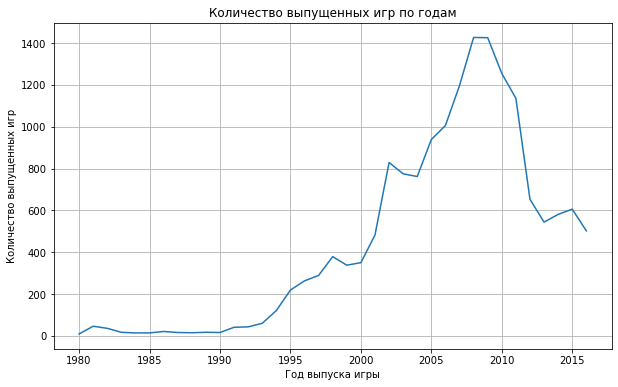

In [32]:
df.pivot_table(index='year_of_release', values='name', aggfunc='count')\
   .plot.line(xlabel='Год выпуска игры', ylabel = 'Количество выпущенных игр', \
              title = 'Количество выпущенных игр по годам', legend = False,figsize= (10,6), grid=True)
plt.show()

<b> Вывод:</b> Судя по графику активный рост рынка компьютерных игр наблюдался с середины 90х годов и до 2008 года, 
после 2008 года наблюдался резкий спад рынка. Возможно, это связано с тем, 
что стали активно развиваться мобильные игры, и часть пользователей перешли в другой сегмент.

Поскольку сейчас мы анализируем данные с целью прогноза на 2016 год,а рынок очень волатилен,
логично брать для анализа более поздний период (после спада рынка, например, начиная с 2009 года).

### 3.2. Изменение продаж по платформам

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Найдем, за какой характерный срок появляются новые и исчезают старые платформы.

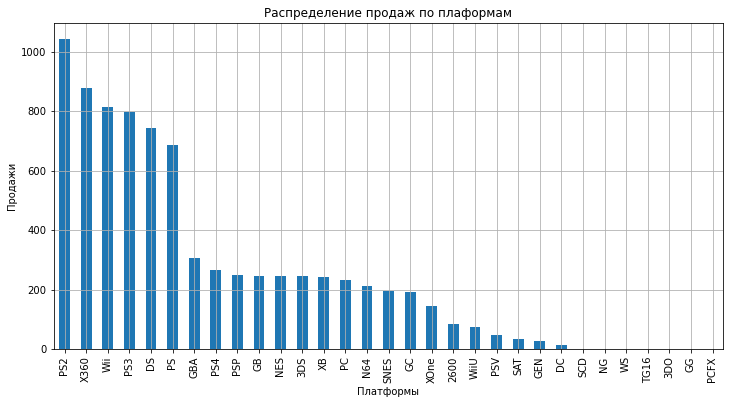

In [33]:
df_pivot_platform = df.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
                      .sort_values(by='total_sales', ascending=False)
df_pivot_platform.plot.bar(title= 'Распределение продаж по плаформам',
                           xlabel='Платформы', ylabel='Продажи',legend=False, figsize=(12,6), grid=True)
plt.show()

Судя по графику выделяются 6 платформ с наибольшими суммарными продажами за весь период: PS2, X360, Wii, PS3, DS и PS.

In [34]:
#создадим таблицу с топ-6 платформами по продажам за весь период
top_6 = df_pivot_platform.head(6).reset_index()
top_6

,platform,total_sales
0,PS2,1043.09
1,X360,876.36
2,Wii,813.47
3,PS3,796.75
4,DS,743.74
5,PS,686.89


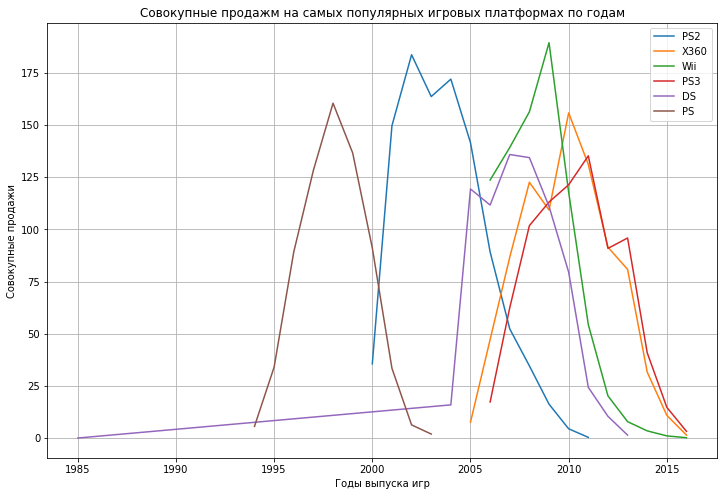

In [35]:
#построим распределение продаж на топ-6 платформ по годам

plt.figure(figsize=(12,8))
plt.xlabel('Годы выпуска игр')
plt.ylabel('Совокупные продажи')
plt.title('Совокупные продажм на самых популярных игровых платформах по годам')
plt.grid()
for i in list(top_6['platform']):
    plt.plot(df[df['platform']==i].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum'), label=i)
    plt.legend()

<b> Вывод:</b> график распределения продаж на топ-6 платформах по годам наглядно иллюстрирует "срок жизни" платформы, чаще всего он составляет 10 лет. Некоторые платформы существуют дольше (например, как платформа DS), некоторые чуть меньше (например, как PS). Однако, в среднем первые пять лет существования платформы наблюдается рост продаж, затем он достигает своего пика, остальные пять лет наблюдается планомерный спад объемов продаж.

Поскольку рынок очень изменчивый, а нам необходимо построить прогнозы на 2017 год, возьмем период для анализа с 2012 по 2016 включительно (4 полных года и часть 2016ого). Начинаем с 2012 года, так как до этого времени показатели рынка были совсем иные, темпы развития рынка высокие, предпочтения пользователей быстро меняются, взяв такой период мы сможем отследить и новые "растущие" платформы и старые платформы, все еще демонстрирующие хорошие показатели объемов продаж.

In [36]:
df = df[df['year_of_release']>2011]

In [37]:
# посмотрим на суммарные продажи по платформам за период с 2012 года
new = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').\
      sort_values(by='total_sales', ascending=False).reset_index()
new

,platform,total_sales
0,PS4,265.79
1,PS3,245.53
2,X360,216.14
3,3DS,185.74
4,XOne,145.05
5,WiiU,76.24
6,PC,56.88
7,PSV,43.38
8,Wii,32.76
9,DS,11.84


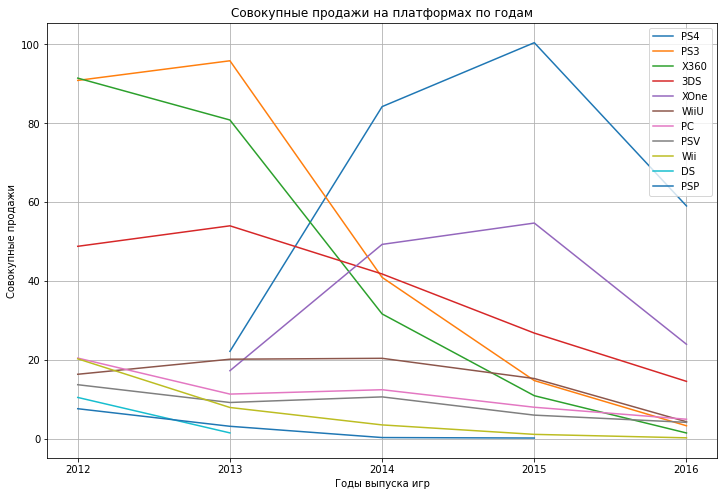

In [38]:
#построим распределение продаж по годам, чтобы выявить наиболее перспективные платформы
plt.figure(figsize=(12,8))
plt.xlabel('Годы выпуска игр')
plt.ylabel('Совокупные продажи')
plt.title('Совокупные продажи на платформах по годам')
plt.grid()
for i in new['platform'].unique():
    plt.plot(df[df['platform']==i].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum'), label=i)
    plt.xticks([2012, 2013, 2014, 2015, 2016])
    plt.legend()

<b> Вывод: </b> на графике видны перспективные платформы, которые находятся в фазе активного роста: это PS4 и XOne. Также, возможен рост продаж на платформе WiiU, созданной в 2012 году. Также, несмотря на спад объемов продаж, все еще хорошие показатели у 3DS, PS3.

### 3.3. Диаграмма размаха по глобальным продажам игр в разбивке по платформам

In [39]:
#посмотрим на описательную статистику глобальных продаж, а также построим гистограмму распределения total_sales
df['total_sales'].describe()

count    2886.000000
mean        0.447114
std         1.101542
min         0.010000
25%         0.030000
50%         0.110000
75%         0.380000
max        17.090000
Name: total_sales, dtype: float64

<AxesSubplot:>

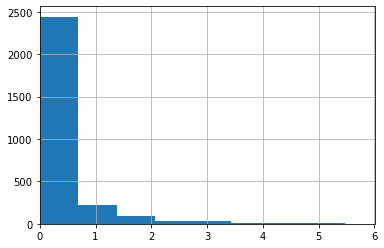

In [40]:
plt.xlim(0,6)
df['total_sales'].hist(bins=25)

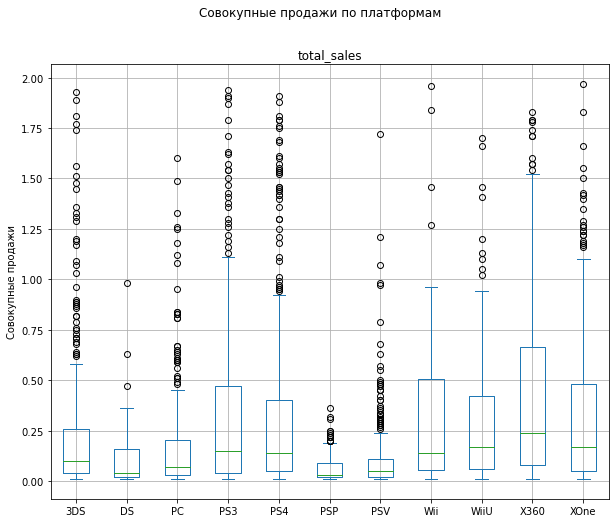

In [41]:
# Построим "ящик с усами" для совокупных продаж по платформам, для наглядности представления данных уберем выбросы

df[df['total_sales']<2].plot.box(ylabel ='Совокупные продажи', title= 'Совокупные продажи по платформам', \
                                 grid=True,column='total_sales', by='platform', figsize=(10,8))
plt.show()

<b> Вывод: </b> На графике можно увидеть, что медианое значение продаж у платформ различное. У всех оно меньше 0,25 млн. проданных копий. Выделяются платформы Wii и WiiU, X360 и XOne, PS3 И PS4, эти платформы демонстрируют больший разброс показателей объемов продаж и хорошие медианные значения продаж. 

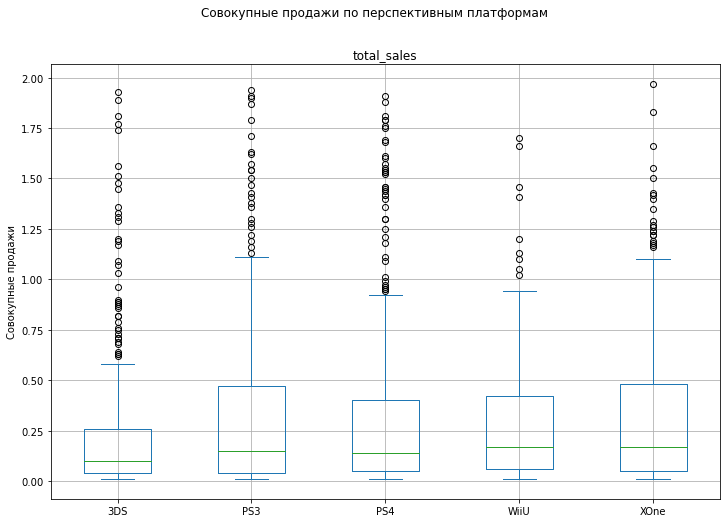

In [42]:
#посмотрим на тот же график в разрезе тех платформ, которые мы определили как наиболее перспективные 
# в плане возможного роста обхемом продаж

list = ['PS4', 'XOne', 'WiiU', '3DS', 'PS3']
df[df['total_sales']<2].query('platform==list').plot.box(ylabel ='Совокупные продажи',
                                                         title= 'Совокупные продажи по перспективным платформам', \
                                                         grid=True, column='total_sales', by='platform', figsize=(12,8))
plt.show()


<b> Вывод: </b> Наибольшие показатели по объемам продаж наблюдаем на платформах PS3, XOne и WiiU.
    Максимальный разброс показателей у платформ PS3 И XOne. Платформа PS4 по объемам продаж стремится к PS3 (есть достаточно много "выбросов" по показателям продаж). Минимальные показатели медианных продаж и разброса данных наблюдаем на платформе 3DS, по ней также присутствуют "выбросы", платформа сравнительно новая, есть перспективы развития.

### 3.4. Влияние отзывов пользователей и критиков на продажи игр

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

Возьмем платформу X360.

In [43]:
#создадим выборку
df_X360 =  df.query('platform=="X360"')

In [44]:
df_X360

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,14.86
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,12.56
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,9.33
66,Halo 4,X360,2012,Shooter,6.65,2.28,0.04,0.74,87.0,7.0,M,8.97
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,unknown,8.37
...,...,...,...,...,...,...,...,...,...,...,...,...
16181,Turbo: Super Stunt Squad,X360,2013,Sports,0.00,0.01,0.00,0.00,NaN,4.5,E,0.01
16190,Young Justice: Legacy,X360,2013,Action,0.00,0.01,0.00,0.00,NaN,6.2,T,0.01
16221,Ride,X360,2015,Racing,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01
16342,Dragon Ball Z for Kinect,X360,2012,Fighting,0.01,0.00,0.00,0.00,49.0,2.1,T,0.01


In [45]:
#посмотрим, сколько пропусков в столбцах с оценками критиков и пользователей
df_X360.isna().sum()

name                 0
platform             0
year_of_release      0
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       121
user_score          57
rating               0
total_sales          0
dtype: int64

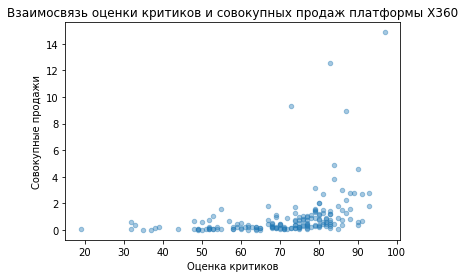

In [46]:
# Построим диаграмму рассеяния для общий продаж и оценки критиков
df_X360.plot(x='critic_score', y='total_sales', kind='scatter',
              title = 'Взаимосвязь оценки критиков и совокупных продаж платформы X360', 
             xlabel = 'Оценка критиков', ylabel = 'Совокупные продажи', alpha=0.4) 
plt.show()

In [47]:
# Подсчитаем коэфициент корреляции между общими продажами на платформе и оценкой критиков
df_X360['total_sales'].corr(df_X360['critic_score'])

0.36025976902915396

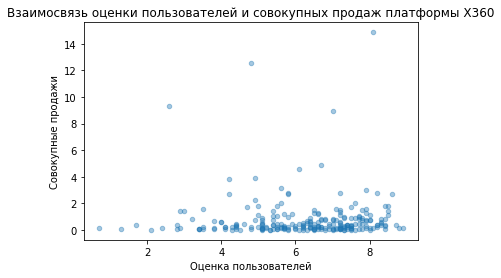

In [48]:
# Построим диаграмму рассеяния для общих продаж и оценки пользователей
df_X360.plot(x='user_score', y='total_sales', kind='scatter', 
             title = 'Взаимосвязь оценки пользователей и совокупных продаж платформы X360', 
             xlabel = 'Оценка пользователей', ylabel = 'Совокупные продажи', alpha=0.4) 
plt.show()

In [49]:
# Подсчитаем коэфициент корреляции между общими продажами на платформе и оценкой пользователей
df_X360['total_sales'].corr(df_X360['user_score'])

0.006562723093225382

<b>Вывод: </b> Судя по диаграммам рассеяния и коэффициентам корреляции есть слабая положительная взаимосвязь между объемом продаж игр и оценкой критиков. И практически отсутствует взаимосвязь между объемом продаж и оценкой пользователей. То есть чаще при выборе игры покупатели ориентируются на экспертное мнение критиков и почти не учитывают мнение других игроков.

In [50]:
# Посмотрим на показатели корреляции оценок и объемов продаж по остальным платформам

corr_critic_score_sales = []
corr_user_score_sales = []
df_corr = pd.DataFrame(columns=['platform', 'corr_critic_score_sales','corr_user_score_sales'])

for i in new['platform'].head(8):
    df_platform = df[df['platform']==i]
    corr_critic_score_sales.append(df_platform['total_sales'].corr(df_platform['critic_score']))
    corr_user_score_sales.append(df_platform['total_sales'].corr(df_platform['user_score']))
    
df_corr['platform'] = new['platform'].head(8)
df_corr['corr_critic_score_sales'] = pd.DataFrame(corr_critic_score_sales)
df_corr['corr_user_score_sales'] = pd.DataFrame(corr_user_score_sales)
df_corr

,platform,corr_critic_score_sales,corr_user_score_sales
0,PS4,0.405887,-0.031261
1,PS3,0.334439,-0.005342
2,X360,0.360260,0.006563
3,3DS,0.320804,0.199239
4,XOne,0.417206,-0.068804
5,WiiU,0.347062,0.399211
6,PC,0.237523,-0.123060
7,PSV,0.103737,0.018354


<b> Вывод: </b> Коэффициент корреляции между продажами и оценкой критиков всегда положительный. Взаимосвязь слабая. Корреляция продаж с оценкой пользователей как правило ниже по сравнению с корреляцией оценки критиков. Она, как правило, близка к нулю. Только для одной платформы WiiU наблюдаем обратную картину. Покупатели игр на этой платформе больше доверяют оценкам пользователей нежели оценкам критиков. Такой результат также может быть связан с недостатком данных для анализа (возможно, много пропусков в графе с оценками критиков, так как платформа появилась на рынке не очень давно).
В целом для всех платформ повторяется картина с платформой X360.

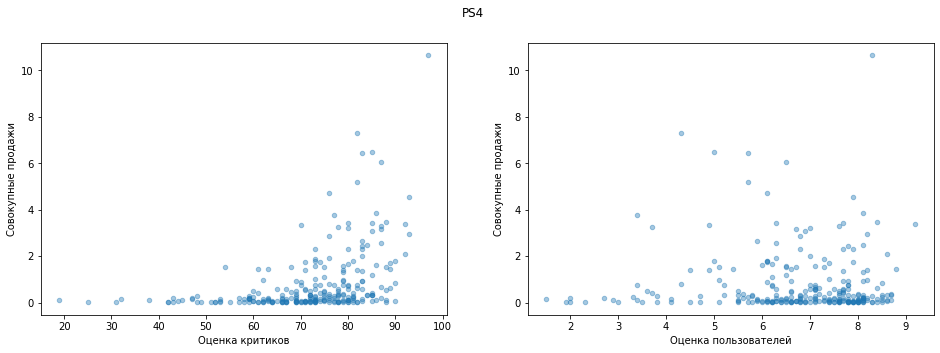

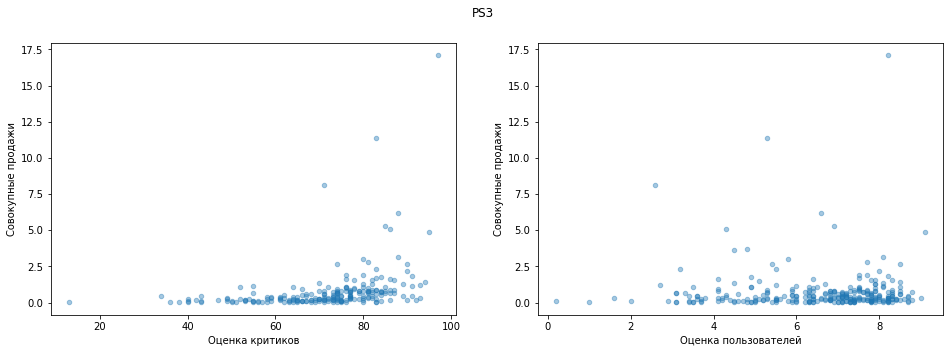

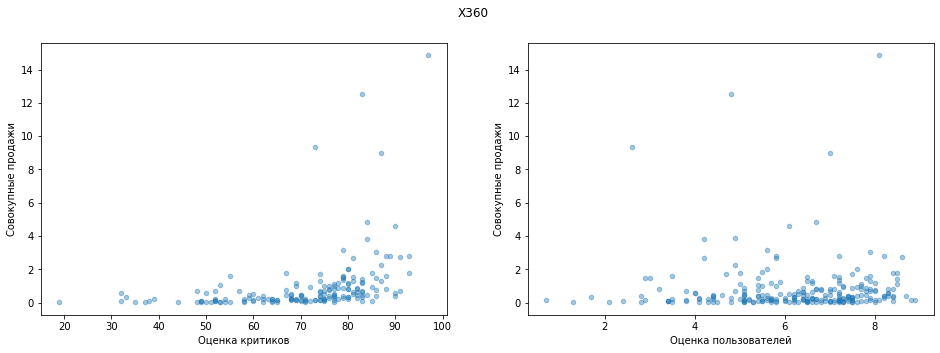

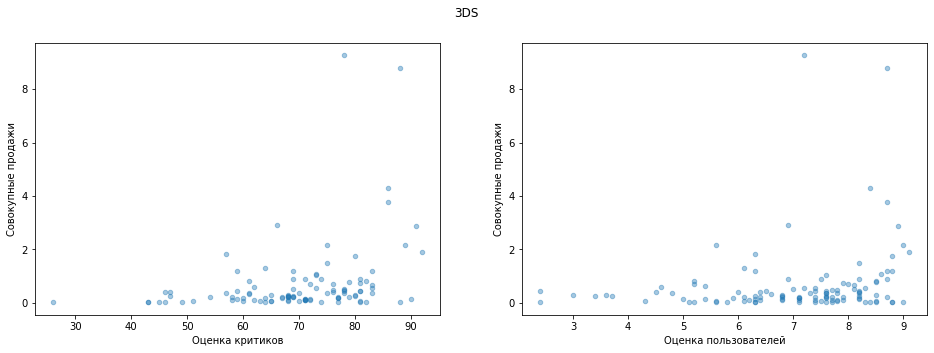

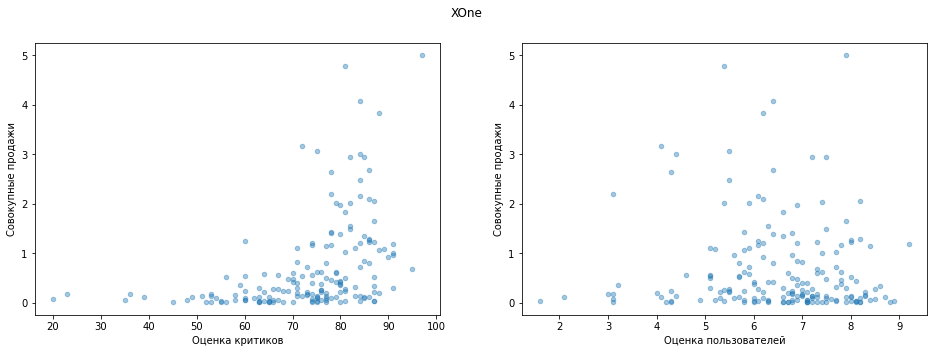

In [51]:
# Построим диаграммы рассеяния общих продаж и оценок критиков и пользователей по первым пяти по объемам продаж платформам 

for i in df_corr['platform'].head(5).unique():
    df_platform = df[df['platform']==i]
    fig, ax = plt.subplots(1,2, figsize=(16,5))
    fig.suptitle(i)
    df_platform.plot(x='critic_score', y='total_sales', kind='scatter', xlabel = 'Оценка критиков', ylabel = 'Совокупные продажи', alpha=0.4, ax=ax[0])
    df_platform.plot(x='user_score', y='total_sales', kind='scatter',xlabel = 'Оценка пользователей', ylabel = 'Совокупные продажи', alpha=0.4,ax=ax[1])
    plt.show()
    

<b> Вывод: </b> на диаграммах рассеяния наблюдаем ту же картину, что и с платформой X360. "Рассеяние" точек шире для распределения оценки пользователей и объемов продаж по сравнению с оценкой критиков. В целом люди больше доверяют мнению критиков, если их оценки присутствуют.

### 3.5. Распределение игр по жанрам

Посмотрим на общее распределение игр по жанрам, определим самые прибыльные жанры, выделим жанры с высокими и низкими продажами. 

In [52]:
#Посмотрим на общее количество игр в разных жанрах и на совокупные продажи по жанрам

pivot_genre = df.pivot_table(index='genre', values= 'total_sales', aggfunc=['count','sum'])
pivot_genre.columns = ['games_quantity', 'total_sales']
pivot_genre.sort_values(by='total_sales', ascending=False)

,games_quantity,total_sales
genre,,
Action,1031,389.98
Shooter,235,267.47
Role-Playing,370,177.97
Sports,268,158.63
Misc,192,77.37
Platform,85,55.42
Racing,115,47.01
Fighting,109,40.02
Simulation,80,32.93


<b> Вывод:</b> по объемам продаж лидируют жанры action, shooter, role-playing и sports. В конце списка игры жанров adventure, strategy и puzzle. Объемы продаж и количество выпускаемых игр не всегда напрямую взаимосвязаны. Но на первом месте все равно остаются игры action.

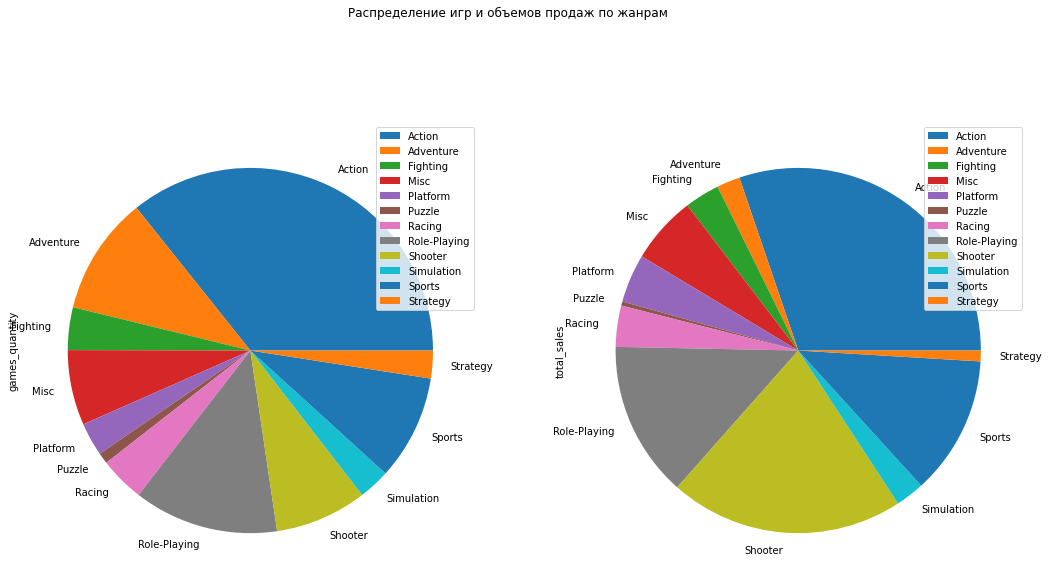

In [53]:
#визуализируем информацию об общем количестве игр и объеме продаж по жанрам с помощью круговой диаграммы 
fig, ax = plt.subplots(1,2, figsize=(18,10))
plt.suptitle('Распределение игр и объемов продаж по жанрам')
pivot_genre.plot.pie(y='games_quantity', ax=ax[0])
pivot_genre.plot.pie(y='total_sales', ax=ax[1])
plt.show()

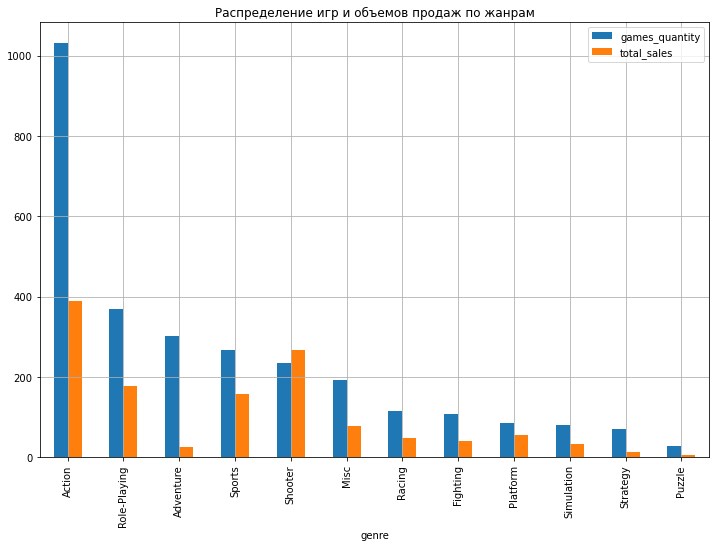

In [54]:
#также построим совместную столбчатую диаграмму

pivot_genre.sort_values(by='games_quantity', ascending=False).plot.bar(figsize=(12,8), grid=True, 
                                                                       title='Распределение игр и объемов продаж по жанрам')
plt.show()

Мы видим, что самые часто выпускаемые игры не всегда самые прибыльные. Однако, возможно на показатель совокупных продаж по жанру могут сильно влиять выбросы. Например, какая-то игра могла стать очень популярной в своем жанре на какой-то платформе, и она "тянет" совокупные продажи по этому жанру вверх. Так как мы хотим понять, какие именно жанры наиболее стабильны в плане прогноза будущих продаж вне зависимости от платформы, построим гистограмму распределения медианных продаж по жанрам, а также диаграммы размаха по каждому из жанров.

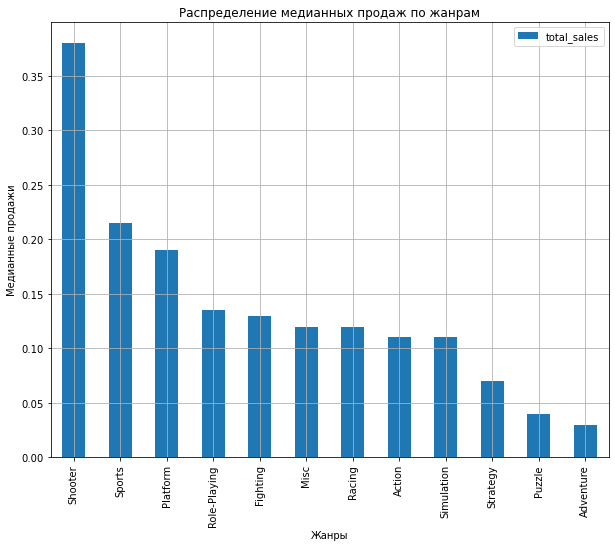

In [55]:
df.pivot_table(index='genre', values= 'total_sales', aggfunc='median')\
  .sort_values(by='total_sales', ascending=False)\
  .plot.bar(xlabel='Жанры', ylabel ='Медианные продажи', 
            title= 'Распределение медианных продаж по жанрам', grid= True, figsize=(10,8))
plt.show()

Судя по гистограмме распределения медианных продаж по жанрам, лидируют жанры Shooter, Sports, Platform и Role-Playing. Жанр Action лишь на 8 месте. Видимо, для этого жанра как раз есть выбросы. Посмотрим на диаграммы размаха.

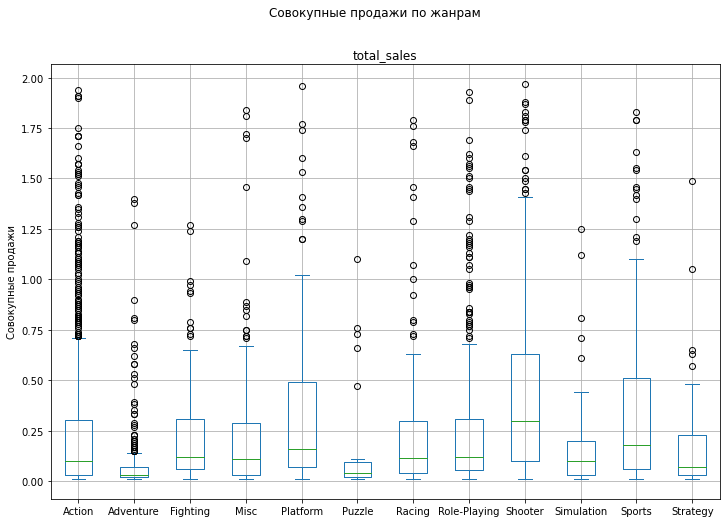

In [56]:
df[df['total_sales']<2].plot.box(ylabel ='Совокупные продажи', title= 'Совокупные продажи по жанрам', \
                                grid=True, column='total_sales', by='genre', figsize=(12,8))
plt.show()

Диаграммы размаха наглядно иллюстрируют тот факт, что на совокупные продажи по жанру Action сильно влияют выбросы, при этом более стабильными и перспективными по продажам являются жанры Shooter, Sports, Platform.

<div class="alert alert-info"> 
В ходе исследовательского анализа данных сделаны следующие 
значимые выводы:
    
- рынок компьютерных игр достаточно волатилен, для исследования достаточно проанализировать данные с 2012 года, так как с этого момента показатели рынка уже сильно изменились.
    
- "срок жизни" платформы составляет в среднем 10 лет, пять лет  из них рост объемов продаж до достижения пика, пять лет - период спада
    
- выделены несколько перспективных платформ. Это в первую очередь, PS4 и XOne (фаза активного роста), возможен рост продаж на 
платформе WiiU (показывает стабильные показатели объемов продаж), и 3DS, PS3(падение объемов продаж, но все еще высокие показатели)

- оценка критиков (при ее наличии) для пользователей более важна  при принятии решения о покупке игры по сравнению с  оценками пользователей. Однако данная взаимосвязь слабоположительная. Вероятно, влияют и другие значимые факторы

- по объемам продаж лидируют жанры action, shooter, role-playing и sports. Однако сказывается влияние одиночных хорошо продаваемых игр. При учете медианных данных по продажам наиболее стабильно популярными жанрами можно назвать Shooter, Sports, Platform.

</div>

## 4. Портреты пользователей для каждого региона

Составим портрет пользователя каждого региона (NA, EU, JP). Определим топ-5 платформ и жанров, оценим доли рынка, а также изучим влияние рейтинга ESRB на продажи в регионах.


Портрет пользователя региона na_sales


,platform,na_sales,share_%
0,X360,140.05,23.70
1,PS4,108.74,18.40
2,PS3,103.38,17.49
3,XOne,93.12,15.76
4,3DS,55.31,9.36


,genre,na_sales,share_%
0,Action,177.84,30.09
1,Shooter,144.77,24.50
2,Sports,81.53,13.80
3,Role-Playing,64.00,10.83
4,Misc,38.19,6.46


,rating,na_sales
0,M,239.96
1,E,117.79
2,unknown,85.58
3,E10+,77.84
4,T,69.80



Портрет пользователя региона eu_sales


,platform,eu_sales,share_%
0,PS4,141.09,27.84
1,PS3,106.86,21.08
2,X360,74.52,14.70
3,XOne,51.59,10.18
4,3DS,42.64,8.41


,genre,eu_sales,share_%
0,Action,159.34,31.44
1,Shooter,113.47,22.39
2,Sports,69.09,13.63
3,Role-Playing,48.53,9.58
4,Racing,27.29,5.38


,rating,eu_sales
0,M,202.99
1,E,115.40
2,unknown,73.47
3,E10+,57.92
4,T,57.04



Портрет пользователя региона jp_sales


,platform,jp_sales,share_%
0,3DS,87.79,45.59
1,PS3,35.29,18.32
2,PSV,21.04,10.93
3,PS4,15.96,8.29
4,WiiU,13.01,6.76


,genre,jp_sales,share_%
0,Role-Playing,65.44,33.98
1,Action,52.80,27.42
2,Misc,12.86,6.68
3,Simulation,10.41,5.41
4,Fighting,9.44,4.90


,rating,jp_sales
0,unknown,103.41
1,E,29.27
2,T,29.13
3,M,22.20
4,E10+,8.57


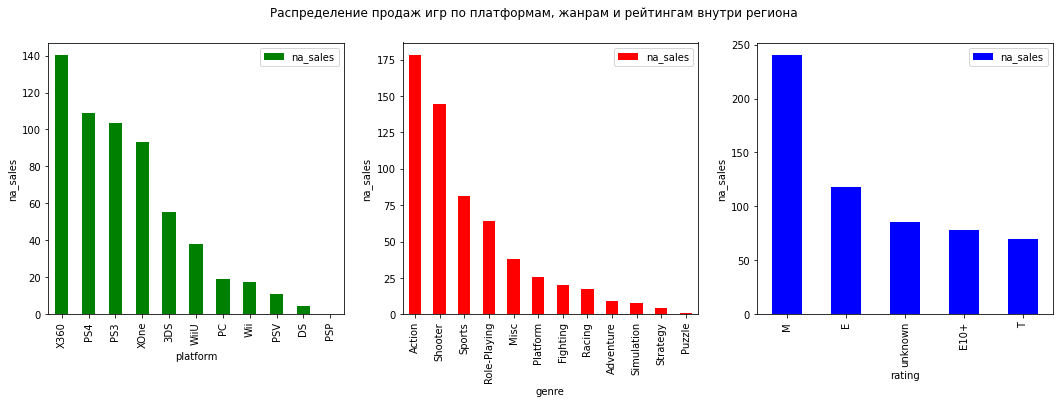

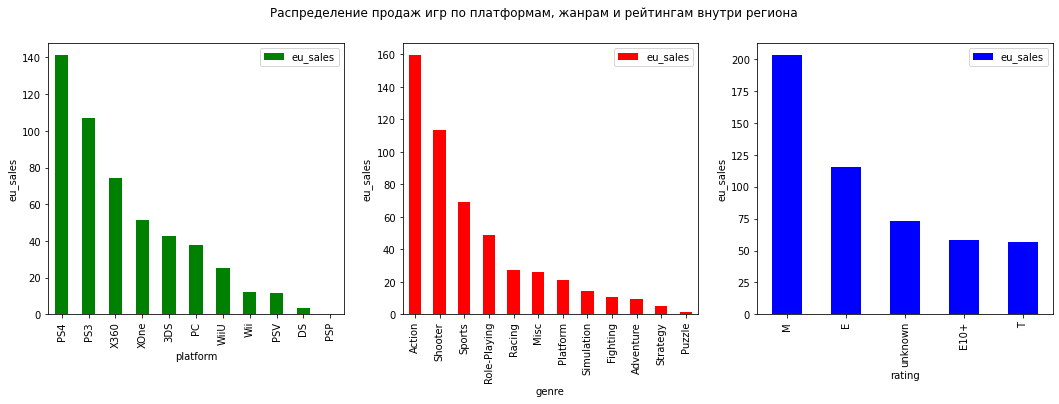

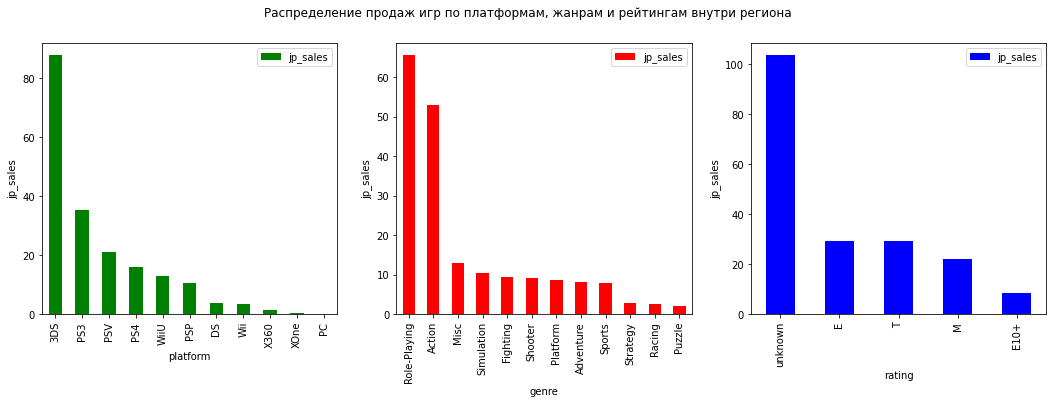

In [57]:
# построим необходимые сводные таблицы и построим графики для каждого из регионов

list = ['na_sales', 'eu_sales','jp_sales']

for i in list:
    print()
    
    print('Портрет пользователя региона', i)
    df_region_platform = df.groupby('platform')[i].agg('sum').sort_values(ascending=False).reset_index()
    df_region_platform['share_%'] = round((df_region_platform[i]/df_region_platform[i].sum())*100, 2)
    display(df_region_platform.head(5))
    
    df_region_genre = df.groupby('genre')[i].agg('sum').sort_values(ascending=False).reset_index()
    df_region_genre['share_%'] = round((df_region_genre[i]/df_region_genre[i].sum())*100, 2)
    display(df_region_genre.head(5))
    
    df_region_rating = df.groupby('rating')[i].agg('sum').sort_values(ascending=False).reset_index()
    display(df_region_rating.head(5))
    
    fig, ax = plt.subplots(1,3, figsize=(18,5))
    fig.suptitle('Распределение продаж игр по платформам, жанрам и рейтингам внутри региона')
    df_region_platform[['platform', i]].plot.bar(color='green', x='platform', xlabel='platform', ylabel=i, ax=ax[0])
    df_region_genre[['genre', i]].plot.bar(color='red', x='genre', xlabel = 'genre',ylabel=i, ax=ax[1])
    df_region_rating.plot.bar(color='blue', x='rating', xlabel='rating', ylabel=i,ax=ax[2])

<b> Портрет пользователя в Северной Америке.</b>

- Топ-5 платформ: X360, PS3, PS4, XONe, 3DS. 
  Суммарные продажи на этих платформах составляют 84.71% совокупных продаж региона.

- Топ-5 жанров: Action, shooter, sports, role-playing, misc.
  Суммарные продажи по этим жанрам составляют почти 85,68% совокупных продаж региона.

- С большим отрывом от остальных лидируют игры с рейтингами ESRB:  M ("для лиц старше 17 лет") и E ("для всех возрастных категорий")

<b>Портрет пользователя в Европе.</b>

- Топ-5 платформ: PS4, PS3, X360, XOne, 3DS.
  Суммарные продажи на этих платформах составляют 82.21% совокупных продаж региона. 


- Топ-5 жанров: Action, shooter, sports, role-playing, racing.
  Суммарные продажи по этим жанрам составляют 82.42% совокупных продаж региона. 

- С отрывом от остальных лидируют игры с рейтингами ESRB: M ("для лиц старше 17 лет") и E ("для всех возрастных категорий")

<b>Портрет пользователя в Японии.</b>

- Топ-5 платформ: 3DS, PS3, PSV, PS4, WiiU.
  Суммарные продажи на этих платформах составляют 89.89% совокупных продаж региона. 


- Топ-5 жанров:Role-Playing, Action, Misc, Simulation, Fighting.
  Суммарные продажи по этим жанрам составляют 78.39% совокупных продаж региона. 

- Для большинства игр рейтинг ESRB не определен, на втором месте игры с рейтингом E ("для всех возрастных категорий")

<div class="alert alert-info"> 
   <b>Вывод: </b>
   
Портреты пользователей североамериканского и европейского регионов схожи. Лидируют по объемам продаж одни и те же платформы, игры одних и тех же жанров и возрастных категорий.
    
Для пользователей Японии характерны свои особенности (например, популярность жанра role-playing и отсутствие возрастного рейтинга у популярных игр в регионе).
    
Опираясь на данные анализа выше, а также на полученные портреты пользователей, можно сказать, что, вероятно, нужно сделать ставку на платформы XOne (новая платформа для Xbox, вместо популярной X360) и PS4 (новая платформа вместо популярной PS3), PS3 в Северной Америке и Европе. Жанры выпускаемых игр: shooter и sports (популярны и стабильные по продажам), рейтинга M и E.
    
Для японских покупателей нужна своя сегментация и, вероятно, отдельная рекламная кампания. В данном регионе можно сделать упор на игры role-playing, платформы 3DS и PS3, PS4, игры без международного рейтинга ESRB или рейтинга E.
</div>

## 5. Проверка статистических гипотез

### 5.1. Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [58]:
#создадим необходимые выборки
df_XOne =  df.query('platform=="XOne"')['user_score']
df_PC = df.query('platform=="PC"')['user_score']

In [59]:
#считаем среднее по каждой из выборок
df_XOne.mean()

6.52142857142857

In [60]:
#оценим размер каждой из выборок, посмторим количество пропусков
df_XOne.shape[0]

247

In [61]:
df_XOne.isna().sum()

65

In [62]:
df_PC.mean()

6.428640776699027

In [63]:
df_PC.shape[0]

250

In [64]:
df_PC.isna().sum()

44

<b> Нулевая гипотеза H0 </b> : Средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC
<b> Альтернативная гипотеза H1 </b> : Средние пользовательские рейтингри платформ Xbox One и PC различны

Размер выборок разный, дисперсии по выборкам могут быть различны.

In [65]:
#проведем статистический тест, зададим уровень значимости в 5%
from scipy import stats as st
import numpy as np

In [66]:
results = st.ttest_ind(df_XOne.dropna(), df_PC.dropna(), equal_var=False)

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC не получилось. при условии равенства средних рейтингов пользователей изучаемых платформ, вероятность получить такие или более значимые различия по выборкам составляет 55%.

### 5.2. Проверка гипотезы: Средние пользовательские рейтинги жанров Action и Sports разные

<b> Нулевая гипотеза H0 </b> : Средний пользовательский рейтинг игр жанра Action равен среднему пользовательскому рейтингу 
игр жанра Sports
<b> Альтернативная гипотеза H1 </b>  : Средние пользовательские рейтинги игр жанров Action и Sports различны

In [67]:
#создадим необходимые выборки
df_action= df.query('genre=="Action"')['user_score']
df_sports = df.query ('genre =="Sports"')['user_score']

In [68]:
#подсчитаем средние, посмотрим на размеры выборок и на наличие пропусков
df_action.mean()

6.825047801147237

In [69]:
df_sports.mean()

5.455897435897437

In [70]:
df_action.shape[0]

1031

In [71]:
df_sports.shape[0]

268

In [72]:
df_action.isna().sum()

508

In [73]:
df_sports.isna().sum()

73

In [74]:
#проведем статистический тест с заданным уровнем значимости в 5%

results = st.ttest_ind(df_action.dropna(), df_sports.dropna(), equal_var=False)

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < 0.05:
      print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


Согласно проведенному статистическому тесту нулевую гипотезу отвергаем, с высокой вероятностью средние пользовательские рейтинги игр жанров Action и Sports различны.

<div class="alert alert-info"> 
Проведена проверка статистических гипотез.
    

Гипотезу: "Средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC"
не отвергаем.

Гипотезу:  "Средний пользовательский рейтинг игр жанра Action равен среднему пользовательскому рейтингу 
игр жанра Sports" отвергаем, с высокой вероятностью средние пользовательские рейтинги игр жанров Action и Sports различны.

</div>

## 6. Общий вывод

<div class="alert alert-info"> 
    <b> Цель исследования: </b> выявление закономерностей, определяющих успешность 
игр, для последующего продуктового позиционирования и планирования рекламных кампаний.
    
 Удалось выявить следующие <b>значимые закономерности:</b>

- рынок довольно волатильный, 
показатели рынка сильно изменились после 2008 года, 
при этом средний срок существования игровой платформы - 10 лет,
из которых только 5 лет наблюдается рост объемов продаж. Исходя из выше перечисленного,
для прогноза показателей 2017 года можно взять период с 2012 года
    

- Выявлены потенциально прибыльные платформы: это в первую очередь, PS4 и XOne (фаза активного роста), возможен рост продаж на платформе WiiU (показывает стабильные показатели объемов продаж), 
и 3DS, PS3(падение объемов продаж, но все еще высокие показатели)
    

- Стабильно популярные жанры: Shooter, Sports, Platform, Role-playing
    

- для потенциальных покупателей важна оценка критиков,
на оценку других пользователей практически не обращают внимание 
при покупке

    
- пользователи североамериканского и европейского региона схожи
во вкусах, пользователи Японии отличаются в своих предпочтениях,
для них целесообразно создание отдельной продуктовой концепции и
рекламной кампании

<b>Рекомендации:</b>
1. Продуктовое позиционирование:
   - для североамериканского региона и Европы:
    <u> платформы:</u>   XOne, PS4, PS3, 3DS
    <u>жанры: </u>   shooter, sports, action (для популярных игр в этом жанре с высокой оценкой критиков)
    <u>rating ESRB: </u>  M, E
    
   - для Японии: 
     <u>платформы:</u>  3DS, PS3, WiiU
     <u>жанры: </u>  role-playing, action (для популярных игр в этом жанре с высокой оценкой критиков)
     <u>rating ESRB:</u>  без рейтинга или E
    
    
2. Планирование рекламных кампаний:
   - сегментация кампаний по регионам (отдельно для Северной Америки
и Европы, отдельно для Японии)
   - акцент высокий рейтинг критиков игры
</div>